In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os

In [2]:
# params

secondsPerDay = 86400
loc1 = "/scratch/hcm7920/arcticMiddepthBI-"
loc2 = "/data/monitor.nc"
concentration = ["0", "40", "80", "100"]
maxTs = 1000


In [7]:
time = np.zeros((len(concentration), maxTs))
tEnd = np.zeros(len(concentration),dtype=np.int16)
keMean = np.zeros((len(concentration), maxTs))
keMax = np.zeros((len(concentration), maxTs))
sdVort = np.zeros((len(concentration), maxTs))
etaMax = np.zeros((len(concentration), maxTs))
etaMin = np.zeros((len(concentration), maxTs))
etaMean = np.zeros((len(concentration), maxTs))

In [8]:
for index in range(len(concentration)):
    monitorData = nc.Dataset(loc1+concentration[index]+loc2)
    tEnd[index], = monitorData["T"][:].shape
    time[index,:tEnd[index]] = monitorData["T"][:]/secondsPerDay
    keMean[index,:tEnd[index]] = monitorData["ke_mean"][:]
    keMax[index,:tEnd[index]]  = monitorData["ke_max"][:]
    sdVort[index,:tEnd[index]] = monitorData["vort_a_sd"][:]
    etaMax[index,:tEnd[index]] = monitorData["dynstat_eta_max"][:]
    etaMin[index,:tEnd[index]] = monitorData["dynstat_eta_min"][:]
    etaMean[index,:tEnd[index]] = monitorData["dynstat_eta_mean"][:]

array([901, 901, 901, 901], dtype=int16)

Text(0.5, 1.0, 'Domain average kinetic energy, selected runs')

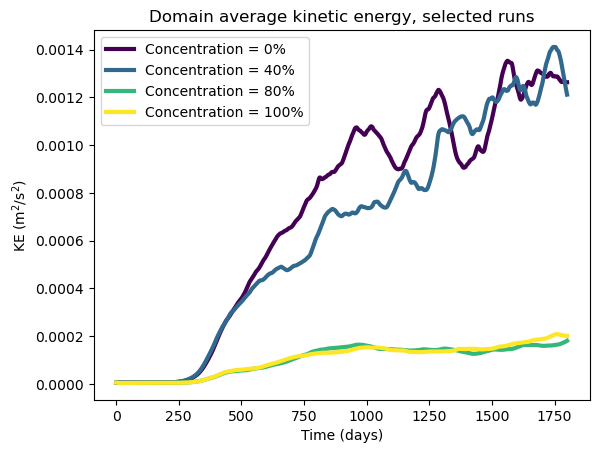

In [22]:
colors = plt.cm.viridis(np.linspace(0,1,len(concentration)))
for index in range(len(concentration)):    
    plt.plot(time[index,:tEnd[index]], keMean[index,:tEnd[index]],
             linewidth=3, color=colors[index],
             label=f"Concentration = {concentration[index]}%")
plt.xlabel("Time (days)")
plt.ylabel(r"KE ($\mathrm{m}^2/\mathrm{s}^2$)")
plt.legend()
plt.title("Domain average kinetic energy, selected runs")

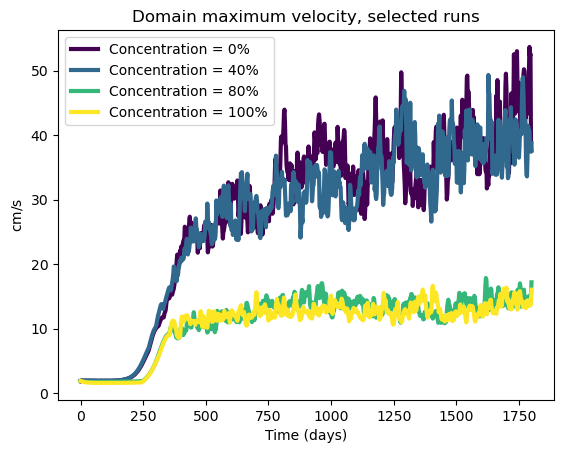

In [23]:
for index in range(len(concentration)):    
    plt.plot(time[index,:tEnd[index]], np.sqrt(keMax[index,:tEnd[index]])*100,
             linewidth=3, color=colors[index],
             label=f"Concentration = {concentration[index]}%")
plt.xlabel("Time (days)")
plt.title("Domain maximum velocity, selected runs")
plt.ylabel(r"$\mathrm{cm}/\mathrm{s}$")
plt.legend()

Text(0.5, 1.0, 'Domain vorticity std dev, selected runs')

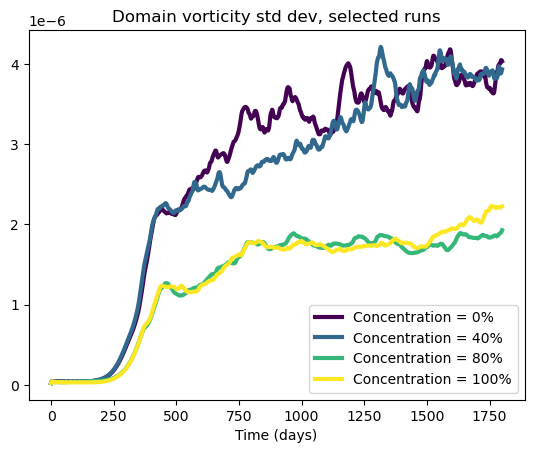

In [24]:
for index in range(len(concentration)):    
    plt.plot(time[index,:tEnd[index]], sdVort[index,:tEnd[index]],
             linewidth=3, color=colors[index],
             label=f"Concentration = {concentration[index]}%")
plt.legend()
plt.xlabel("Time (days)")
plt.title("Domain vorticity, selected runs")

Text(0.5, 1.0, 'Domainwide SSH stats')

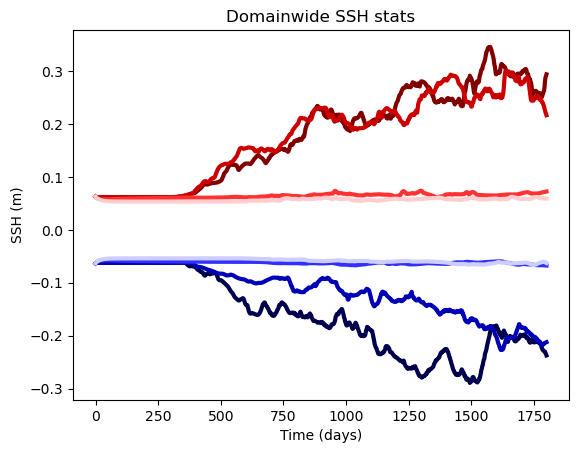

In [25]:
colors1 = plt.cm.seismic(np.linspace(0,0.45,len(concentration)))
colors2 = plt.cm.seismic(np.linspace(1,0.55,len(concentration)))
for index in range(len(concentration)):
    plt.plot(time[index,:tEnd[index]], etaMin[index,:tEnd[index]],
             linewidth=3, color=colors1[index],
             label=f"Eta min; Concentration = {concentration[index]}%")
    plt.plot(time[index,:tEnd[index]], etaMax[index,:tEnd[index]],
             linewidth=3, color=colors2[index],
             label=f"Eta max; Concentration = {concentration[index]}%")

plt.xlabel("Time (days)")
plt.ylabel("SSH (m)")
plt.title("Domainwide SSH stats")
